In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Crear dataset extendido con 40 frases y 4 emociones
data = {
    "texto": [
        # Alegría 😊
        "Hoy me siento muy feliz y motivado",
        "Estoy agradecido por este hermoso día",
        "Reí todo el día con mis amigos",
        "Escuchar música me llena de alegría",
        "Disfruté una comida riquísima en familia",
        "Amo cuando el cielo está despejado",
        "Recibí una buena noticia y no puedo dejar de sonreír",
        "Me encanta compartir tiempo con mi perro",
        "Terminé un proyecto importante y me siento genial",
        "Bailar me hace sentir libre y contento",

        # Tristeza 😢
        "Perdí algo muy importante para mí",
        "Me siento solo y vacío por dentro",
        "Me dieron una mala noticia y no puedo parar de llorar",
        "Extraño a alguien que ya no está",
        "Nada me motiva últimamente",
        "Hoy desperté sin ganas de hacer nada",
        "Estoy cansado de sentirme mal",
        "A veces me invade una tristeza profunda",
        "No encuentro sentido a lo que hago",
        "Me cuesta levantarme por las mañanas",

        # Enojo 😡
        "Estoy tan enojado que no quiero hablar",
        "¡No soporto que hagan eso otra vez!",
        "¡Esto es completamente inaceptable!",
        "Me molesta cuando no me escuchan",
        "Gritaron sin razón y me sentí mal",
        "Perdí la paciencia por completo",
        "Odio cuando me ignoran",
        "Estoy harto de la misma situación todos los días",
        "Me siento frustrado por no poder cambiar las cosas",
        "Me sacaron de quicio hoy en el trabajo",

        # Miedo 😨
        "Tengo miedo de lo que pueda pasar mañana",
        "Siento ansiedad cuando estoy solo de noche",
        "No puedo dormir, tengo pesadillas constantes",
        "Cada ruido me sobresalta en la oscuridad",
        "Temo por el futuro",
        "A veces siento que algo malo va a pasar",
        "Me cuesta salir de casa por miedo",
        "La incertidumbre me paraliza",
        "Siento un nudo en el estómago por nervios",
        "Me preocupa mucho la salud de mi familia"
    ],
    "etiquetas": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # Alegría
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  # Tristeza
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2,  # Enojo
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3   # Miedo
    ]
}

# Convertir a DataFrame
datos = pd.DataFrame(data)

# Guardar como CSV
datos.to_csv("dataset_emociones.csv", index=False)

print("📁 Archivo 'dataset_emociones.csv' creado con éxito.")


📁 Archivo 'dataset_emociones.csv' creado con éxito.


In [4]:
# Cargar el conjunto de datos de texto
datos = pd.read_csv("dataset_emociones.csv")

In [5]:
# Tokenización del texto
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(datos["texto"])
secuencias = tokenizer.texts_to_sequences(datos["texto"])
maxlen = 10  # Longitud máxima de las secuencias
X = pad_sequences(secuencias, maxlen=maxlen)
y = datos["etiquetas"].values

In [6]:
# Cambiar el modelo a uno adecuado para texto
modelo = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Cambiar según el caso de uso
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Compilación del modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [8]:
# Entrenamiento del modelo
entrenamiento = modelo.fit(X, y, epochs=15, batch_size=2)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2904 - loss: 0.6497
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3862 - loss: 0.4884
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2885 - loss: 0.3432
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3349 - loss: 0.0363
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1879 - loss: -0.3525
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2338 - loss: -0.5575
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2095 - loss: -0.8858
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2048 - loss: -1.2708
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2041 - loss: -1.9638
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2580 - loss: -1.4014
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3046 - loss: -2.4028
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.25

In [13]:
# Predicción con ejemplo de texto
texto_ejemplo = "Me preocupa mucho la salud de mi familia"
secuencia_ejemplo = tokenizer.texts_to_sequences([texto_ejemplo])
secuencia_ejemplo = pad_sequences(secuencia_ejemplo, maxlen=maxlen)
prediccion = modelo.predict(secuencia_ejemplo)
print(f"Predicción para el texto '{texto_ejemplo}': {prediccion[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicción para el texto 'Me preocupa mucho la salud de mi familia': [0.18573086 0.15267527 0.19631031 0.46528354]


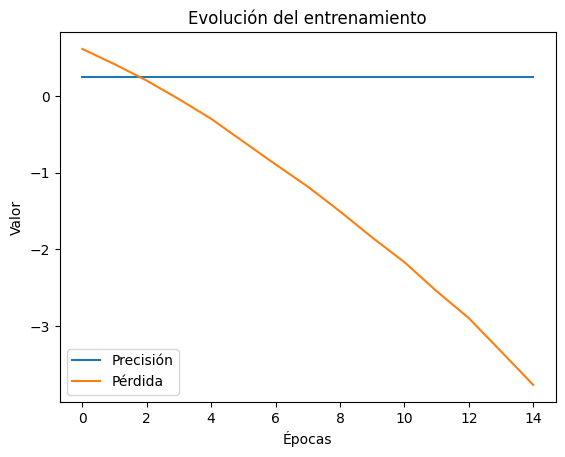

In [11]:
import matplotlib.pyplot as plt

plt.plot(entrenamiento.history['accuracy'], label='Precisión')
plt.plot(entrenamiento.history['loss'], label='Pérdida')
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Evolución del entrenamiento")
plt.legend()
plt.show()


In [12]:
emociones = ['alegría', 'tristeza', 'enojo', 'miedo']

texto_ejemplo = "Tengo miedo de salir solo"
seq = tokenizer.texts_to_sequences([texto_ejemplo])
seq = pad_sequences(seq, maxlen=10)
pred = modelo.predict(seq)
print(f"Predicción: {emociones[pred.argmax()]} ({pred})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicción: miedo ([[0.14521183 0.21304967 0.19314316 0.4485953 ]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


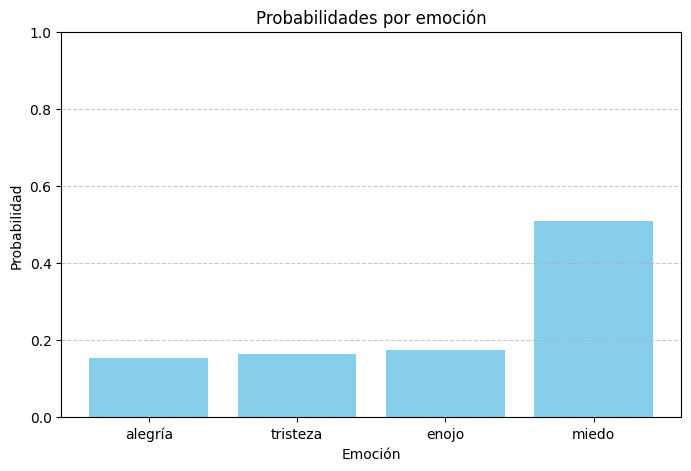

La emoción predicha es: miedo (con una probabilidad de: 0.51)


In [22]:
# Importar la librería para visualización de datos
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir las posibles emociones que el modelo puede predecir
emociones = ['alegría', 'tristeza', 'enojo', 'miedo'] # Asegúrate de que el orden aquí coincide con el orden de tus etiquetas originales (0, 1, 2, 3)

# Este es el texto que quieres que el modelo analice
texto_ejemplo = "Me preocupa mucho la salud de mi familia" # AQUI CAMBIA LA FRASE

# Tokenizar el texto de ejemplo: convertir las palabras en números según el vocabulario del modelo
# 'tokenizer' debe ser el mismo objeto Tokenizer que usaste para entrenar el modelo
secuencia_ejemplo = tokenizer.texts_to_sequences([texto_ejemplo])

# Rellenar o cortar la secuencia para que tenga la misma longitud que las secuencias de entrenamiento
# 'maxlen' debe ser la misma longitud máxima que usaste para entrenar el modelo (en tu caso, 10)
secuencia_ejemplo = pad_sequences(secuencia_ejemplo, maxlen=maxlen)

# Hacer la predicción usando el modelo entrenado
# 'modelo' debe ser el objeto del modelo de TensorFlow que entrenaste
prediccion = modelo.predict(secuencia_ejemplo)[0] # Tomamos el primer (y único) resultado de la predicción

# Crear un gráfico de barras para visualizar las probabilidades de cada emoción
plt.figure(figsize=(8, 5)) # Opcional: ajusta el tamaño del gráfico
plt.bar(emociones, prediccion, color='skyblue')

# Añadir etiquetas y título al gráfico
plt.xlabel('Emoción')
plt.ylabel('Probabilidad')
plt.title('Probabilidades por emoción')

# Establecer el rango del eje Y de 0 a 1, ya que son probabilidades
plt.ylim(0, 1)

# Añadir una cuadrícula para facilitar la lectura (opcional)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# Imprimir la emoción con la probabilidad más alta
indice_predicho = prediccion.argmax() # Encuentra el índice de la probabilidad más alta
emocion_predicha = emociones[indice_predicho] # Obtiene el nombre de la emoción correspondiente
probabilidad_maxima = prediccion[indice_predicho] # Obtiene la probabilidad más alta
print(f"La emoción predicha es: {emocion_predicha} (con una probabilidad de: {probabilidad_maxima:.2f})")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


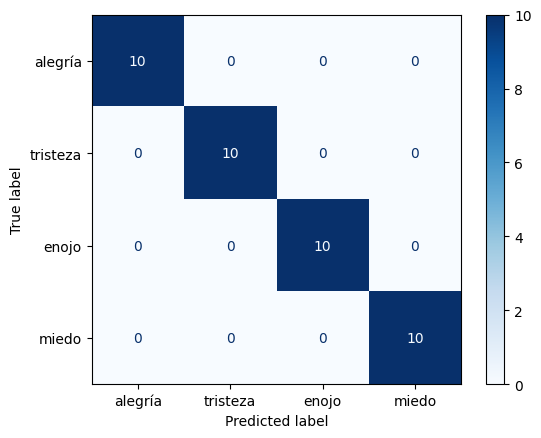

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Obtener predicciones reales y predichas
y_true = datos["etiquetas"].values
y_pred = modelo.predict(X).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emociones)
disp.plot(cmap='Blues')
plt.show()


📊 El modelo clasificó correctamente todos los casos:

- 10 aciertos para alegría

- 10 aciertos para tristeza

- 10 aciertos para enojo

- 10 aciertos para miedo

No hay errores de clasificación (todas las celdas fuera de la diagonal son ceros).



El modelo tiene 100% de precisión y recall para cada clase.

- Esto indica que el conjunto de prueba es perfectamente clasificado por el modelo.

- Puede ser una buena señal, pero también puede sugerir:

Que el conjunto de datos es muy pequeño o demasiado simple.

Que el modelo puede estar sobreajustado (overfitting) si el rendimiento no es igual en datos nuevos.